<a href="https://colab.research.google.com/github/snehakhandale/READABLE/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [3]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [5]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [6]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
data.shape

(73878, 18)

In [8]:
data.isnull().sum()

Year              0
Month             0
day               0
Country           0
State           413
Region            0
City              0
latitude       3790
longitude      3791
Attacktype        0
kill           6228
Wound          8623
target1         471
summary       66129
Group             0
Targettype        0
Weapon            0
motive        66438
dtype: int64

In [9]:
data['Wound']=data['Wound'].fillna(0)
data['kill']=data['kill'].fillna(0)

In [10]:
data['Casualities']=data['kill']+data['Wound']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73878 entries, 0 to 73877
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         73878 non-null  int64  
 1   Month        73878 non-null  int64  
 2   day          73878 non-null  int64  
 3   Country      73878 non-null  object 
 4   State        73465 non-null  object 
 5   Region       73878 non-null  object 
 6   City         73878 non-null  object 
 7   latitude     70088 non-null  float64
 8   longitude    70087 non-null  float64
 9   Attacktype   73878 non-null  object 
 10  kill         73878 non-null  float64
 11  Wound        73878 non-null  float64
 12  target1      73407 non-null  object 
 13  summary      7749 non-null   object 
 14  Group        73878 non-null  object 
 15  Targettype   73878 non-null  object 
 16  Weapon       73878 non-null  object 
 17  motive       7440 non-null   object 
 18  Casualities  73878 non-null  float64
dtypes: f

In [12]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,73878.000000,73878.000000,73878.000000,70088.000000,7.008700e+04,73878.000000,73878.000000,73878.000000
mean,1987.981118,6.465822,15.371802,18.924826,-1.239121e+03,2.074677,2.238934,4.313612
std,7.207305,3.400727,8.812265,24.019816,3.255498e+05,11.986278,50.874927,58.451967
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1983.000000,4.000000,8.000000,6.207810,-7.545161e+01,0.000000,0.000000,0.000000
50%,1989.000000,6.000000,15.000000,17.865293,-1.789272e+00,0.000000,0.000000,0.000000
75%,1994.000000,9.000000,23.000000,38.552185,3.525351e+01,1.000000,0.000000,2.000000
max,2002.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000,9574.000000


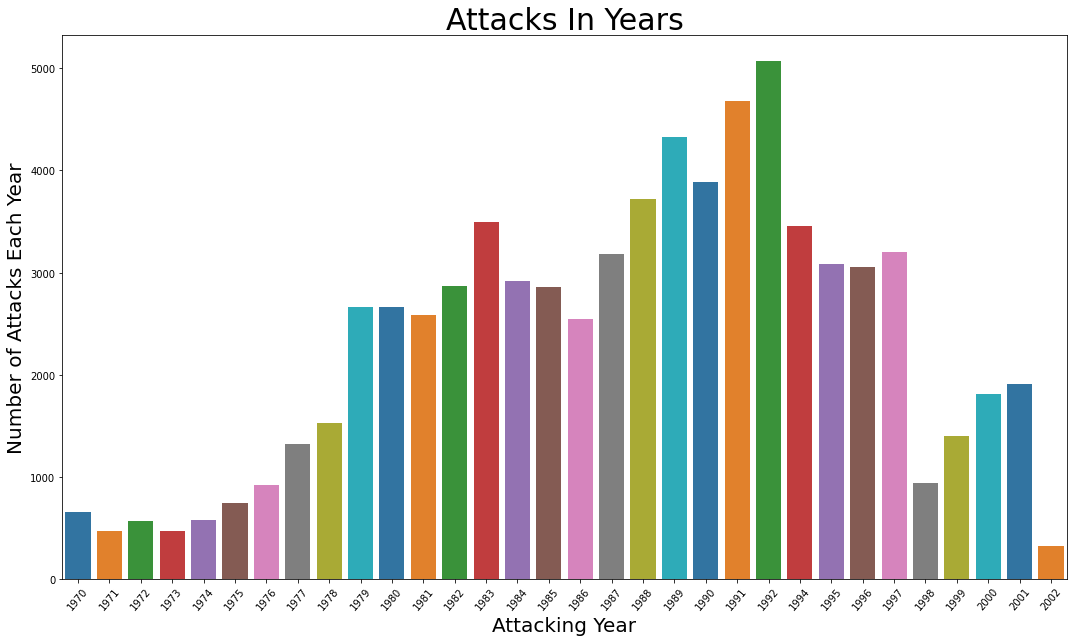

In [13]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()


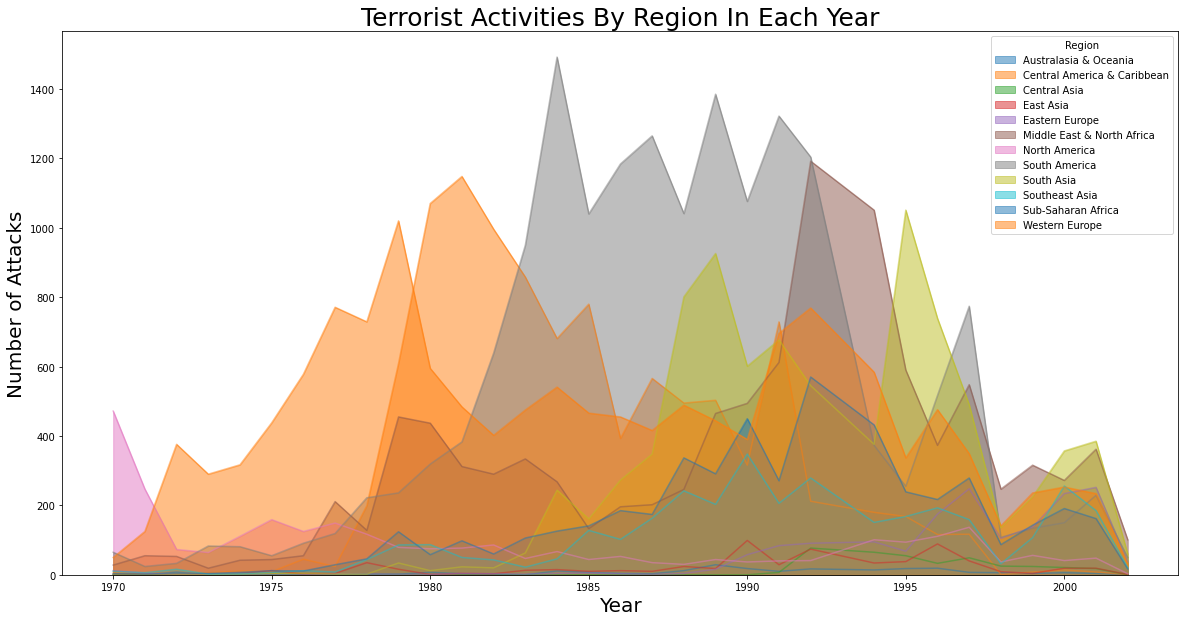

In [14]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [15]:
attack = data.Country.value_counts()[:10]
attack

Colombia          6597
Peru              6029
El Salvador       5320
United Kingdom    4334
India             3496
Spain             3034
Turkey            2544
United States     2437
France            2304
Chile             2275
Name: Country, dtype: int64

In [16]:
data.Group.value_counts()[1:10]

Shining Path (SL)                                   4506
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2662
Basque Fatherland and Freedom (ETA)                 1882
Revolutionary Armed Forces of Colombia (FARC)       1398
National Liberation Army of Colombia (ELN)          1235
Palestinians                                        1122
Liberation Tigers of Tamil Eelam (LTTE)             1104
Kurdistan Workers' Party (PKK)                      1077
Name: Group, dtype: int64

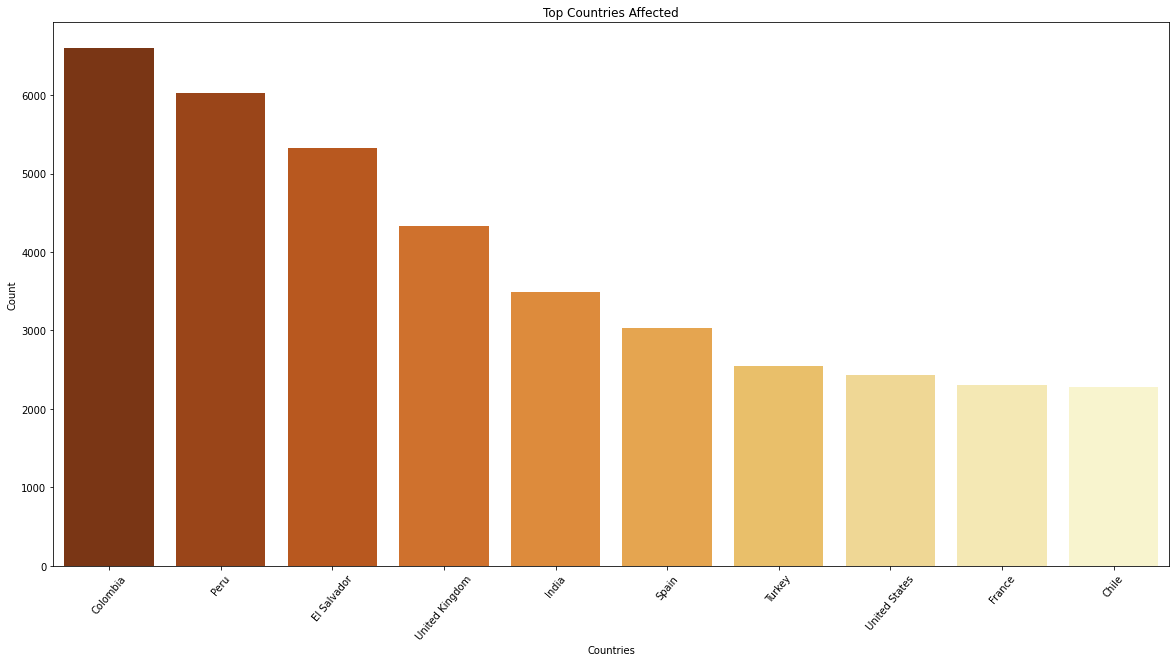

In [17]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

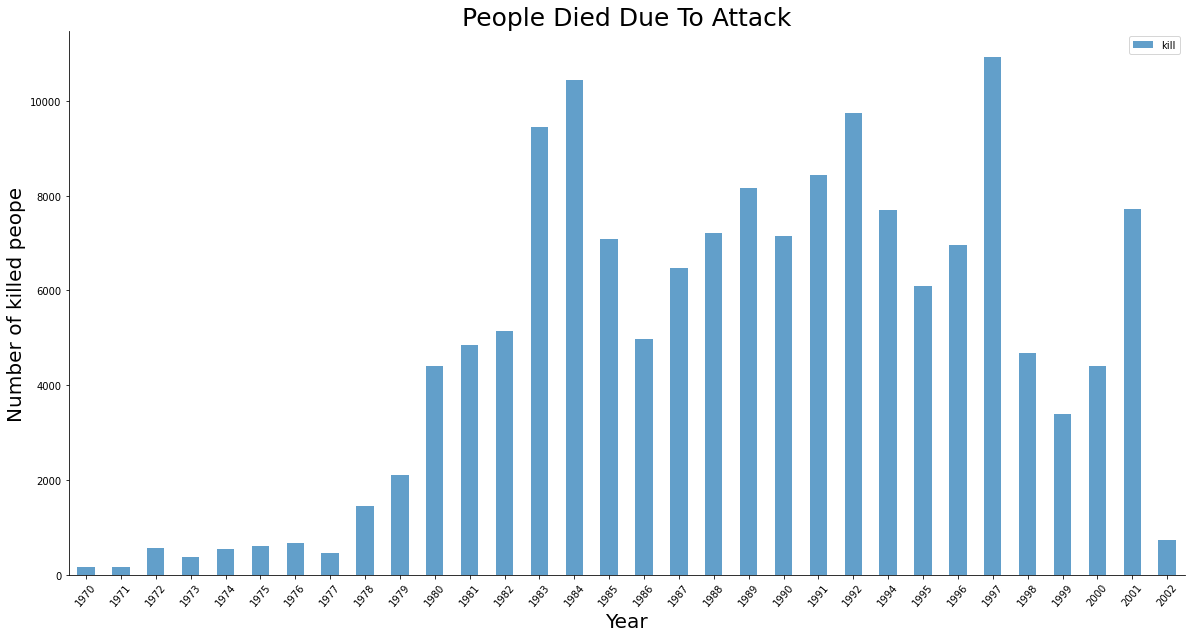

In [18]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

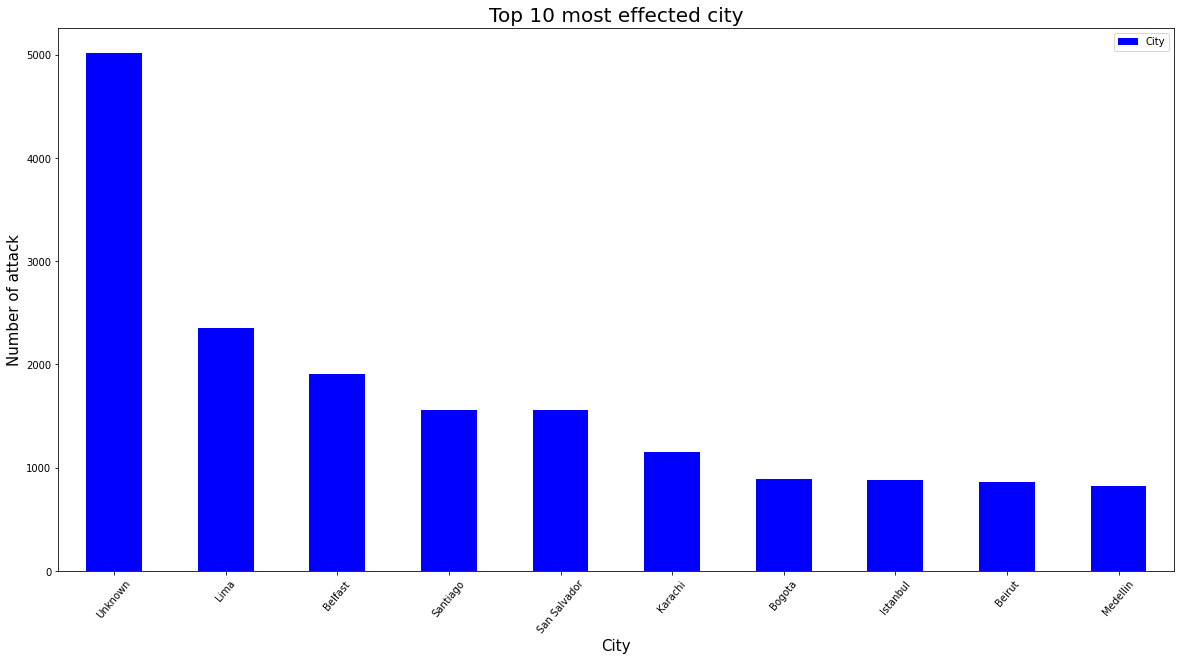

In [19]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

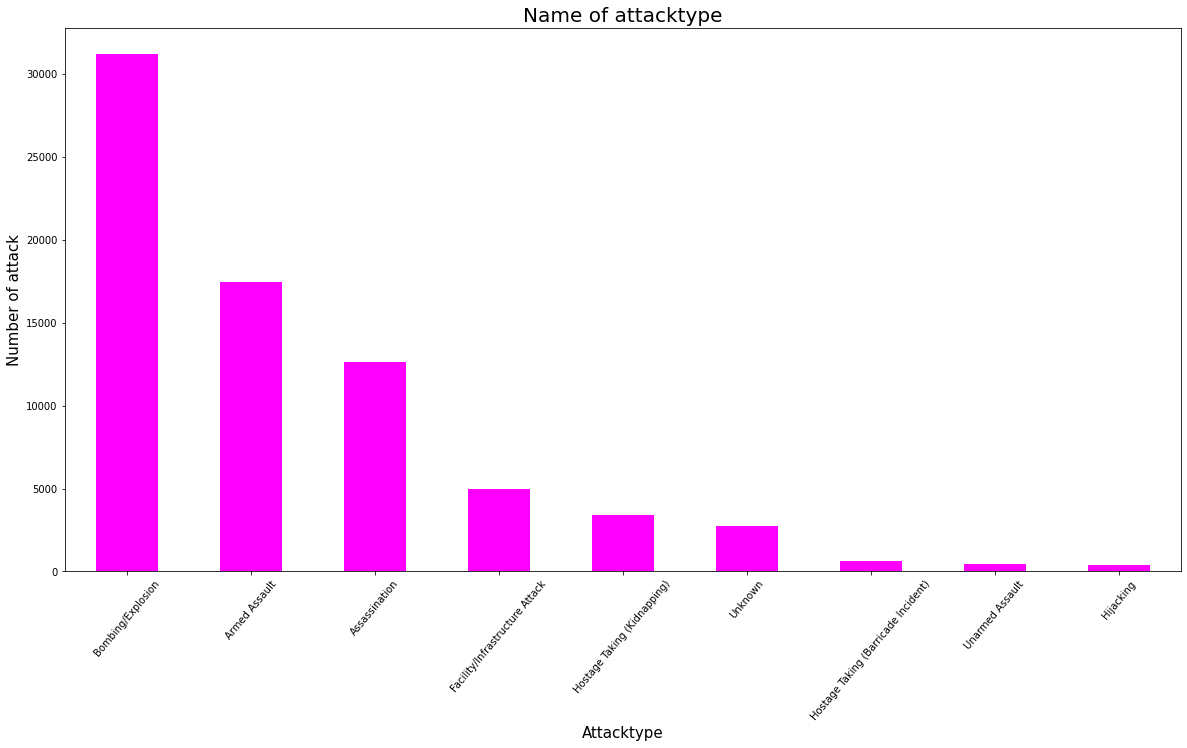

In [20]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

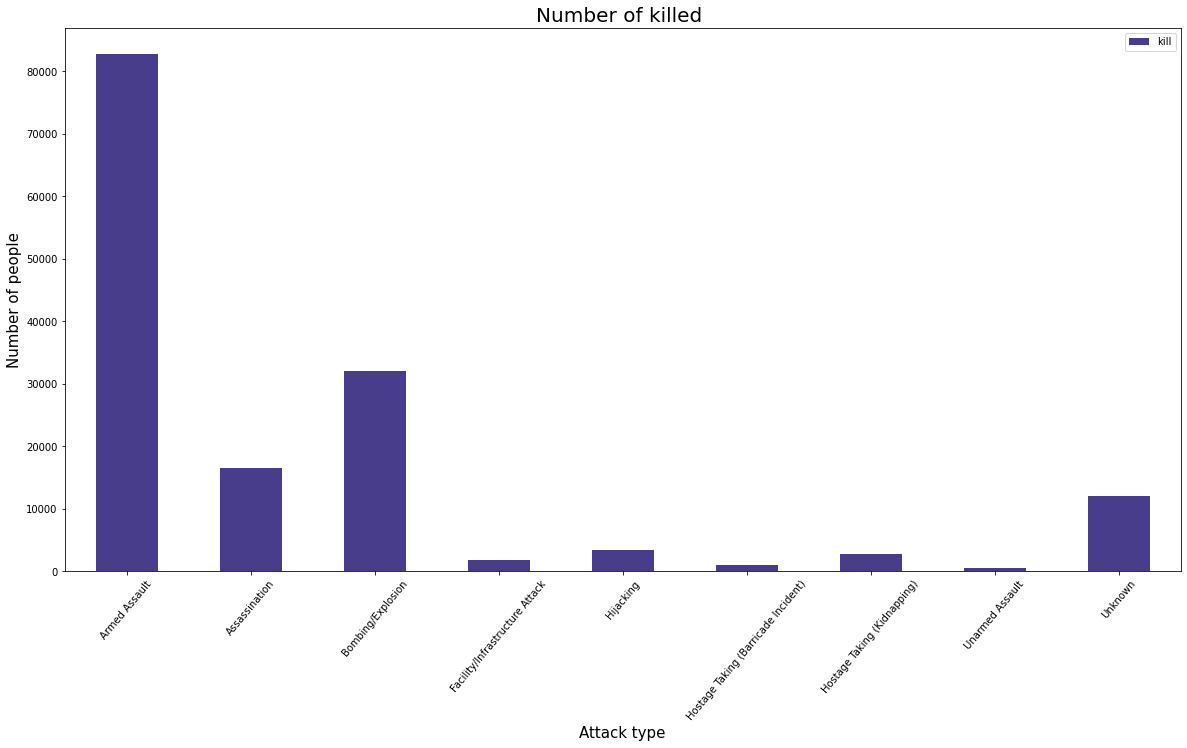

In [21]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

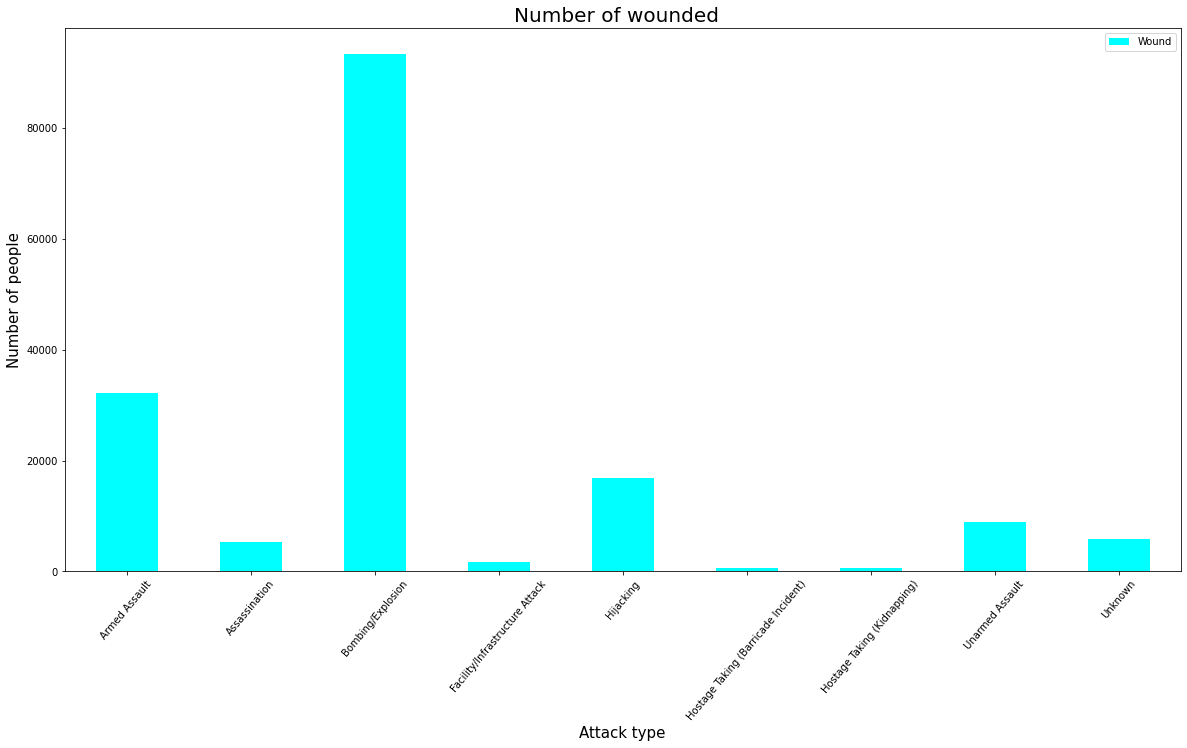

In [22]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

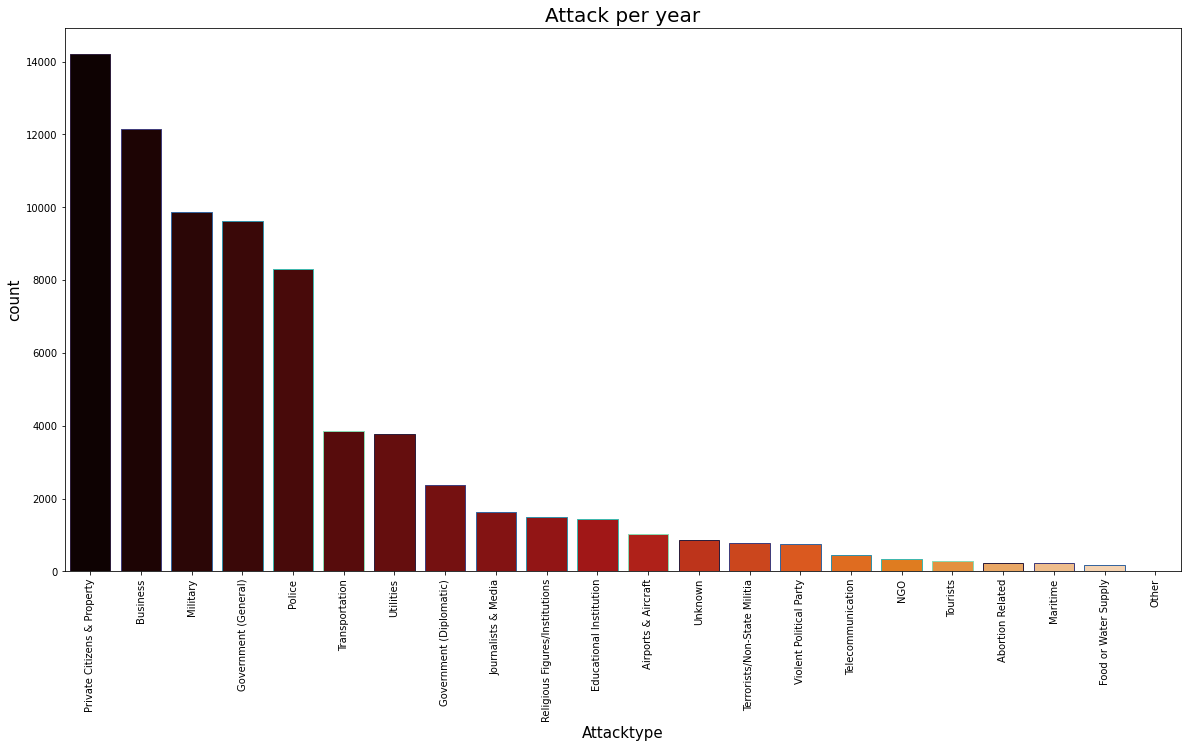

In [23]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

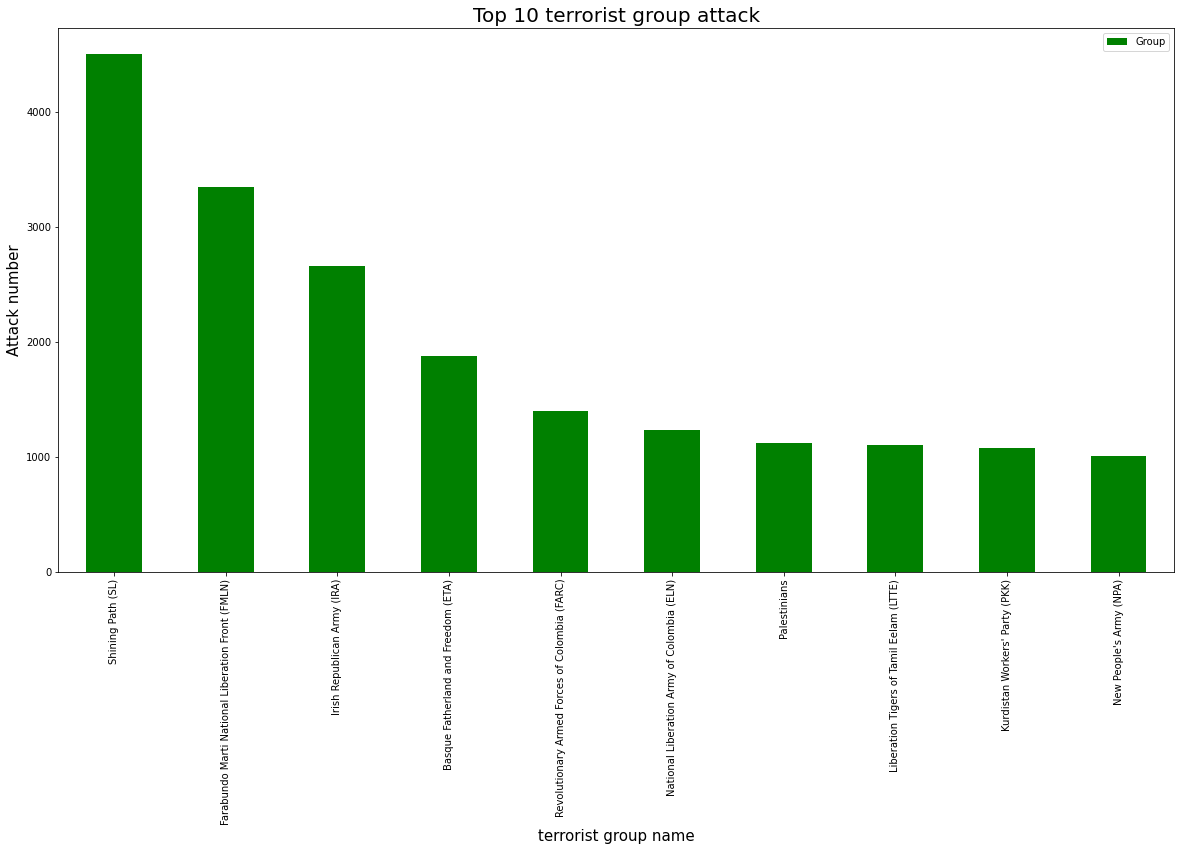

In [25]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

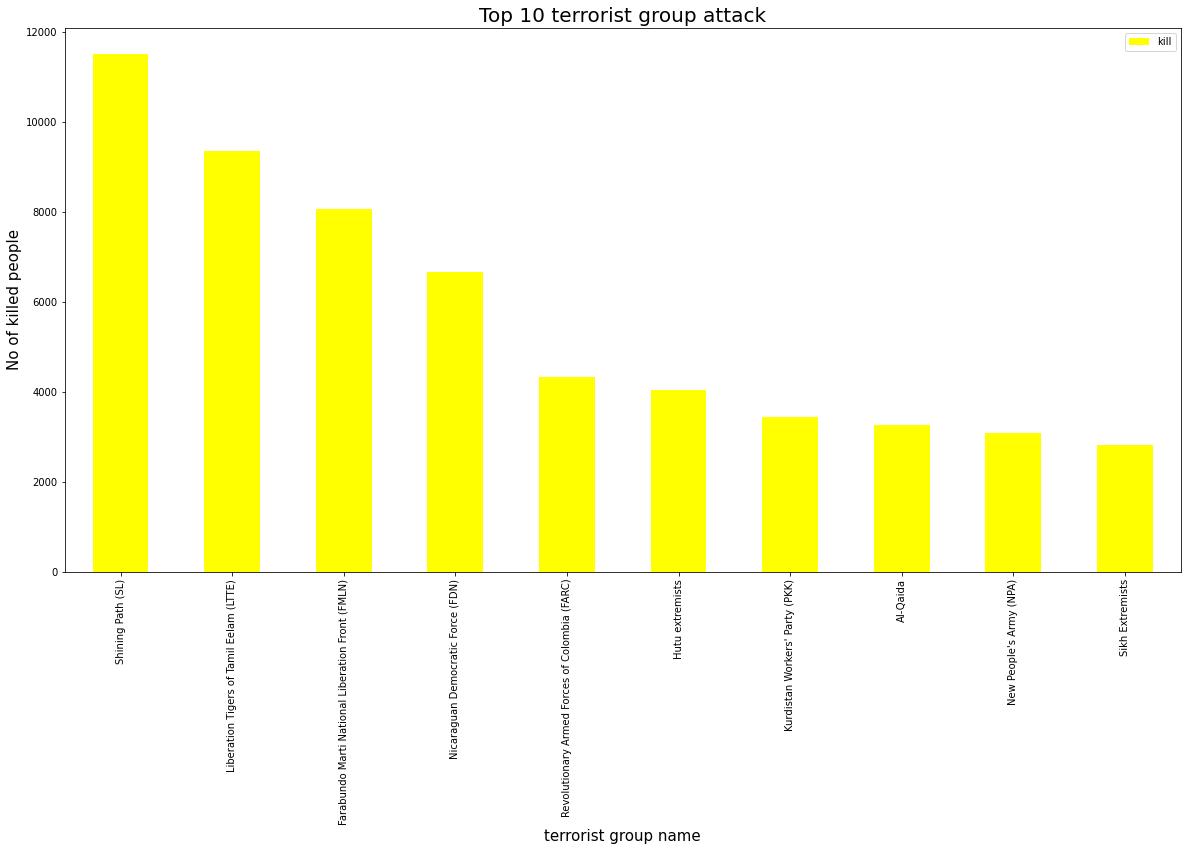

In [26]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='yellow',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()


In [27]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Shining Path (SL),Peru,11503.0
1,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,9322.0
2,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
3,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
4,Revolutionary Armed Forces of Colombia (FARC),Colombia,4311.0
5,Kurdistan Workers' Party (PKK),Turkey,3340.0
6,New People's Army (NPA),Philippines,3089.0
7,Al-Qaida,United States,3001.0
8,National Union for the Total Independence of A...,Angola,2686.0
9,Sikh Extremists,India,2476.0


In [28]:
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 153273


In [29]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,82807.0,16617.0,32123.0,1795.0,3478.0,984.0,2796.0,624.0,12049.0


In [30]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,641.0,41.0,8658.0,0.0,3016.0,0.0,490.0,30.0,13.0,27.0,...,1.0,0.0,750.0,97.0,1.0,93.0,119.0,324.0,70.0,137.0
